Abstract:
Subjects receiving the same vaccine often show different levels of immune responses
and some may even present adverse side effects to the vaccine. Systems vaccinology can
combine omics data and machine learning techniques to obtain highly predictive
signatures of vaccine immunogenicity and reactogenicity. Currently, several machine
learning methods are already available to researchers with no background in
bioinformatics.

### Problem Statement:
### Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression.


In [1]:
#importing packages

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#loading the dataset
df=pd.read_csv('Dataset\h1n1_vaccine_prediction.csv')

## data exploration

In [3]:
df.shape

(26707, 34)

In [4]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [6]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
df.age_bracket.unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [8]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [9]:
df.qualification.unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [10]:
df.has_health_insur.unique()

array([ 1., nan,  0.])

In [11]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:>

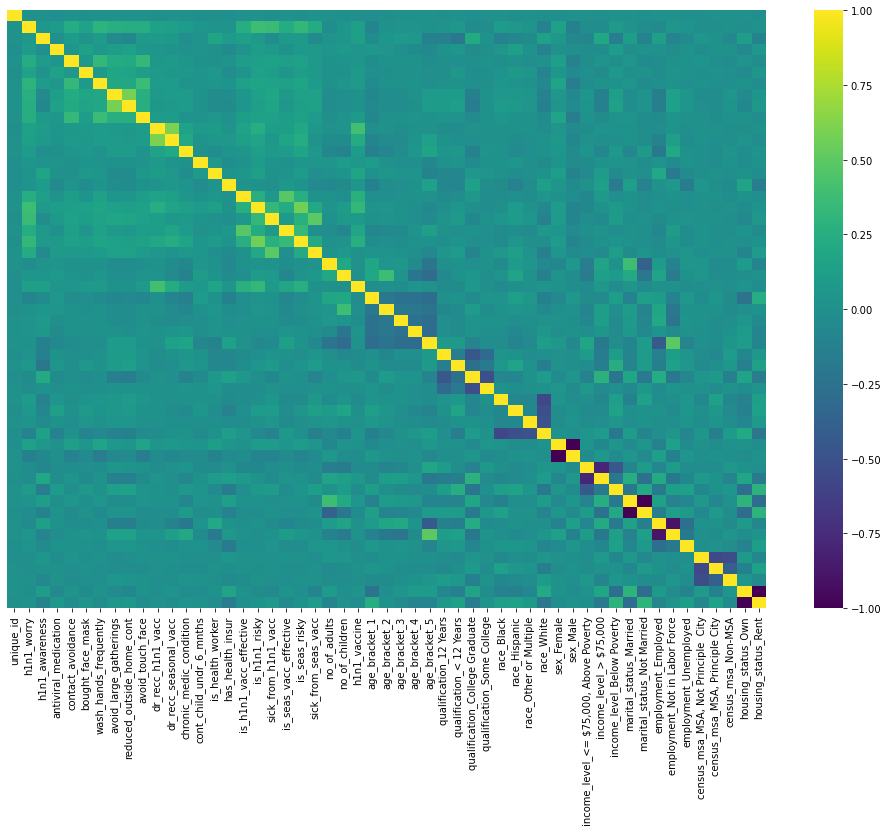

In [70]:
f, ax = plt.subplots(figsize=(17, 11))
sns.heatmap(df.corr(),yticklabels=False,cmap="viridis")

In [12]:
mode1=df['h1n1_worry'].mode().values[0]

In [13]:
df['h1n1_worry']=df['h1n1_worry'].replace(np.nan,mode1)

In [14]:
mode2=df['h1n1_awareness'].mode().values[0]

In [15]:
df['h1n1_awareness']=df['h1n1_awareness'].replace(np.nan,mode2)

In [16]:
mode3=df['antiviral_medication'].mode().values[0]

In [17]:
df['antiviral_medication']=df['antiviral_medication'].replace(np.nan,mode3)

In [18]:
mode4=df['contact_avoidance'].mode().values[0]
mode5=df['bought_face_mask'].mode().values[0]
mode6=df['wash_hands_frequently'].mode().values[0]

In [19]:
df['contact_avoidance']=df['contact_avoidance'].replace(np.nan,mode4)
df['bought_face_mask']=df['bought_face_mask'].replace(np.nan,mode5)
df['wash_hands_frequently']=df['wash_hands_frequently'].replace(np.nan,mode6)

In [20]:
mode7=df['avoid_large_gatherings'].mode().values[0]
df['avoid_large_gatherings']=df['avoid_large_gatherings'].replace(np.nan,mode7)

In [21]:
mode8=df['reduced_outside_home_cont'].mode().values[0]
df['reduced_outside_home_cont']=df['reduced_outside_home_cont'].replace(np.nan,mode8)

In [22]:
mode9=df['avoid_touch_face'].mode().values[0]
df['avoid_touch_face']=df['avoid_touch_face'].replace(np.nan,mode9)

In [23]:
mode10=df['is_seas_risky'].mode().values[0]
df['is_seas_risky']=df['is_seas_risky'].replace(np.nan,mode10)

In [24]:
mod1=df['is_h1n1_risky'].mode().values[0]
df['is_h1n1_risky']=df['is_h1n1_risky'].replace(np.nan,mod1)

In [25]:
mod2=df['is_h1n1_vacc_effective'].mode().values[0]
df['is_h1n1_vacc_effective']=df['is_h1n1_vacc_effective'].replace(np.nan,mod2)

In [26]:
df.race.unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [27]:
mod3=df['cont_child_undr_6_mnths'].mode().values[0]
df['cont_child_undr_6_mnths']=df['cont_child_undr_6_mnths'].replace(np.nan,mod3)

In [28]:
 mode = df.filter(df.columns).mode()
 cols=df.columns
 df[cols]=df[cols].fillna(df.mode().iloc[0])

In [29]:
df1=df

In [30]:
correction = {"18 - 34 Years":1,
             "35 - 44 Years":2,
              "45 - 54 Years":3,
              "55 - 64 Years":4,
              "65+ Years":5}
df1.age_bracket = df.age_bracket.map(correction).fillna(df.age_bracket)

In [32]:
df1.age_bracket.describe()

count    26707.000000
mean         3.186131
std          1.457320
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          5.000000
Name: age_bracket, dtype: float64

In [33]:
df1.age_bracket.unique()

array([4, 2, 1, 5, 3], dtype=int64)

In [34]:
df1.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [35]:
df1.age_bracket.mode()

0    5
dtype: int64

In [36]:
df1.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int64
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [37]:
df1.income_level.unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

In [38]:
df = pd.get_dummies(df, columns=['age_bracket','qualification','race','sex','income_level','marital_status','employment','census_msa'])

In [39]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,"income_level_> $75,000",income_level_Below Poverty,marital_status_Married,marital_status_Not Married,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,1,0,1,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,1,1,0,0,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,1,0,1,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,0,1,0,0,1,0,0


In [54]:
df.dtypes

unique_id                                   int64
h1n1_worry                                float64
h1n1_awareness                            float64
antiviral_medication                      float64
contact_avoidance                         float64
bought_face_mask                          float64
wash_hands_frequently                     float64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                         float64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                   float64
is_health_worker                          float64
has_health_insur                          float64
is_h1n1_vacc_effective                    float64
is_h1n1_risky                             float64
sick_from_h1n1_vacc                       float64
is_seas_vacc_effective                    float64


In [48]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'housing_status',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine', 'age_bracket_1',
       'age_bracket_2', 'age_bracket_3', 'age_bracket_4', 'age_bracket_5',
       'qualification_12 Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Black', 'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male', 'income_level_<= $75,000, Above Poverty',
       'in

In [52]:
cols=[ 'age_bracket_1',
       'age_bracket_2', 'age_bracket_3', 'age_bracket_4', 'age_bracket_5',
       'qualification_12 Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Black', 'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male', 'income_level_<= $75,000, Above Poverty',
       'income_level_> $75,000', 'income_level_Below Poverty',
       'marital_status_Married', 'marital_status_Not Married',
       'employment_Employed', 'employment_Not in Labor Force',
       'employment_Unemployed', 'census_msa_MSA, Not Principle  City',
       'census_msa_MSA, Principle City','census_msa_Non-MSA']

In [53]:
df[cols]=df[cols].astype(int)

In [46]:
df['census_msa_MSA, Principle City']=df['census_msa_MSA, Principle City'].astype(int)

In [55]:
df['housing_status'].unique()

array(['Own', 'Rent'], dtype=object)

In [57]:
df = pd.get_dummies(df, columns=['housing_status'])

unique_id                                    AxesSubplot(0.125,0.749828;0.0596154x0.130172)
h1n1_worry                                AxesSubplot(0.196538,0.749828;0.0596154x0.130172)
h1n1_awareness                            AxesSubplot(0.268077,0.749828;0.0596154x0.130172)
antiviral_medication                      AxesSubplot(0.339615,0.749828;0.0596154x0.130172)
contact_avoidance                         AxesSubplot(0.411154,0.749828;0.0596154x0.130172)
bought_face_mask                          AxesSubplot(0.482692,0.749828;0.0596154x0.130172)
wash_hands_frequently                     AxesSubplot(0.554231,0.749828;0.0596154x0.130172)
avoid_large_gatherings                    AxesSubplot(0.625769,0.749828;0.0596154x0.130172)
reduced_outside_home_cont                 AxesSubplot(0.697308,0.749828;0.0596154x0.130172)
avoid_touch_face                          AxesSubplot(0.768846,0.749828;0.0596154x0.130172)
dr_recc_h1n1_vacc                         AxesSubplot(0.840385,0.749828;0.059615

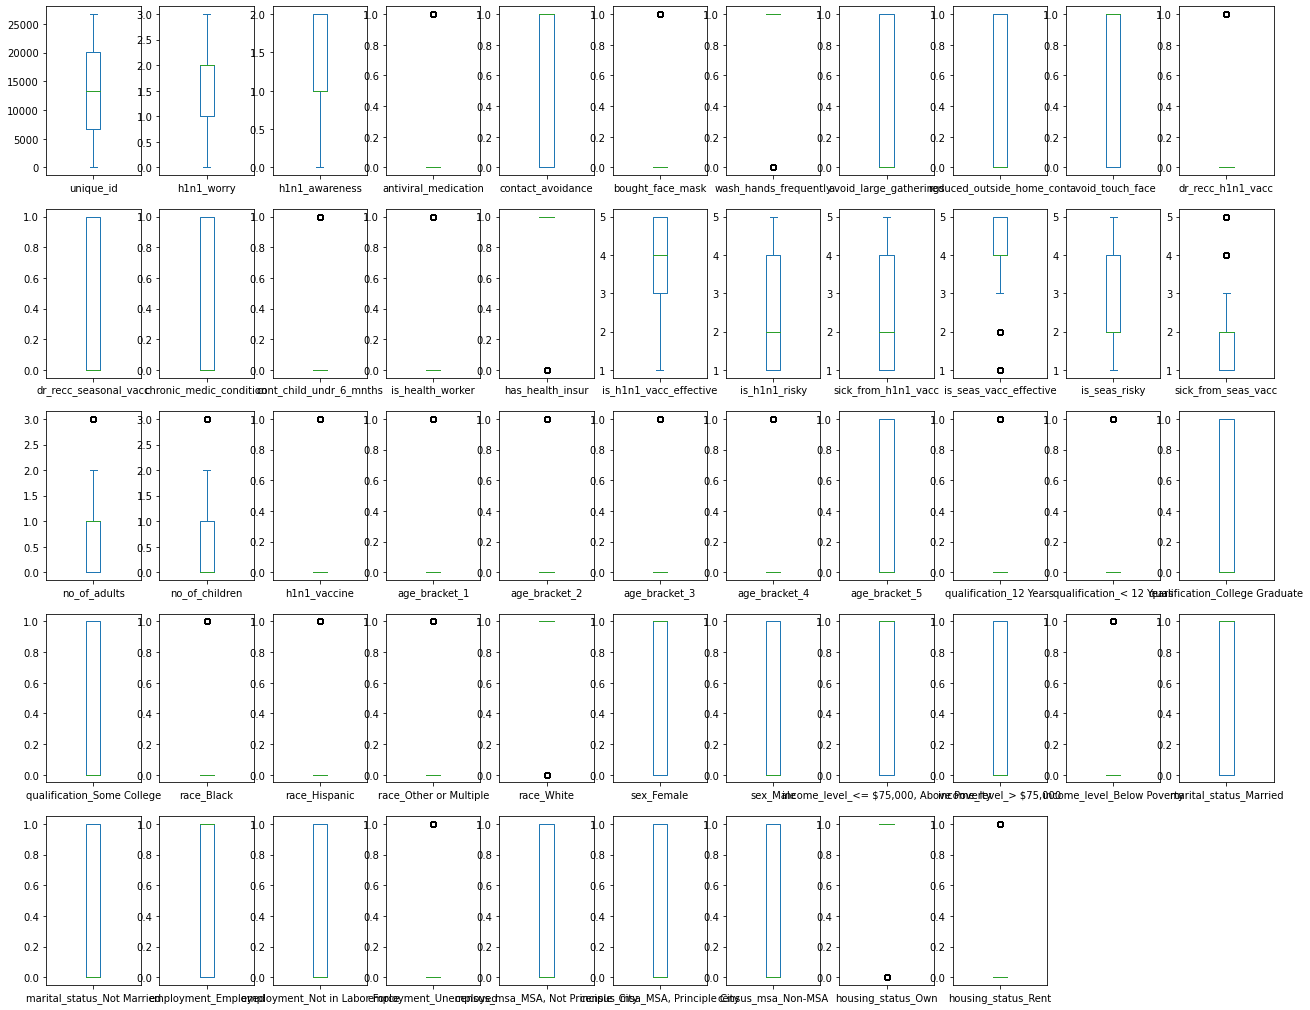

In [64]:
df.plot(subplots=True,layout=(5,11),kind='box',figsize=(22,18))

In [58]:
from sklearn.linear_model import SGDClassifier
x=df.drop(["h1n1_vaccine"], axis = 1)
y=df["h1n1_vaccine"]
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [66]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0)

In [67]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\kousa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
predictions=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8206664170722576